In [1]:
#K. David Roell CFPB 8/30/2016
#Ingests CSVs of quality edits 
#Writes CSV of macro edits by agency code
#Visualizes edits by number and year
#
import pandas as pd
import numpy as np
#from bokeh import charts, io
#from bokeh.plotting import figure, show, output_notebook
#from bokeh.io import output_notebook
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
get_ipython().magic(u'matplotlib inline')
matplotlib.style.use('ggplot')
#output_notebook()

In [2]:
year = 2014 #start year
quality_dfs = {}
while year > 1991:
    try:
        load_df = pd.read_csv('quality_csvs/quality_edits'+str(year)+'.csv')
        load_df['year'] = year
        #print(load_df.head())
    except OSError as e:
        print("data not loaded for {year}".format(year=year), e)
        break
    quality_dfs[year] = load_df
#    print(load_df.head())
    year -=1
#quality_dfs[2014].head()

data not loaded for 2003 File b'quality_csvs/quality_edits2003.csv' does not exist


In [3]:
#load all annual CSVs to dictionary
#create new df copy for summary table
#create macro_dfs.keys()
path = 'quality_by_agency/'
for key in quality_dfs.keys():
    summary_df = quality_dfs[key].copy() #copy df to create summary table
    #print(summary_df.head())
    #summary_df.drop(['q081_numer', 'q081_denom', 'q015_count'], axis=1, inplace=True)#drop unnecessary columns
    #summary_df = summary_df.rename(columns={'q015_value':'q015'}) #standardize names
    #print(summary_df.head()) #view df for checking errors
    #get counts of macro edits by agency code
    by_agency_df = summary_df.groupby('agency').sum() #produce counts of each edit type
#    print(by_agency_df.head())
#    by_agency_df.drop('arid', axis=1, inplace=True) #drop arid
    by_agency_df.drop('year', axis=1, inplace=True)
    #add total index and sum each edit count
    sum_df = by_agency_df.sum() #put sums of edits in new frame
    sum_df.name=('total') #name the frame (required to append)
    by_agency_df = by_agency_df.append(sum_df)
    by_agency_df['totals'] = by_agency_df.sum(axis=1)
    #print(by_agency_df)
    by_agency_df['year'] = key
    if not os.path.exists(path):
        os.makedirs(path)
    try:
        print('writing quality by agency {year}'.format(year=key))
        by_agency_df.to_csv(path+'quality_by_agency_'+str(key)+'.csv') #write to file
    except:
        print('not written for {year}'.format(year=key))

writing quality by agency 2004
writing quality by agency 2005
writing quality by agency 2006
writing quality by agency 2007
writing quality by agency 2008
writing quality by agency 2009
writing quality by agency 2010
writing quality by agency 2011
writing quality by agency 2012
writing quality by agency 2013
writing quality by agency 2014


In [4]:
annuals = {}
for key in quality_dfs.keys():

    annuals[key] = quality_dfs[key].copy()
    annuals[key] = annuals[key].drop(['agency', 'arid', 'year'], axis=1, inplace=True)
#    annuals[key].name = str(key)
    #print(key, macro_dfs[key].count())

In [19]:
first = True
for key in quality_dfs.keys():

    if first:
        first = False
        base = pd.DataFrame(quality_dfs[key].copy())
        base.drop(['agency', 'arid'], axis=1, inplace=True)
        base.set_index('year', drop=True, inplace=True)
        base = pd.DataFrame(base.sum())

        base = base.T
        base['year'] = key
        #print(base.head(), 'base_top', type(base))
    else:
        new = pd.DataFrame(quality_dfs[key].copy())
        new.drop(['agency', 'arid'], axis=1, inplace=True)
        new.set_index('year', drop=True, inplace=True)
        new = pd.DataFrame(new.sum())
        new = new.T
        new['year'] = key
        #print(new.head())
        base = pd.concat([base, new], axis=0)
print(base.head())

print('writing quality counts by year')
base.to_csv('quality_counts_by_year.csv', index=False)

       q001     q002     q003  q004   q005      q013     q014     q024  \
0   90069.0  12208.0     29.0   4.0    5.0   60270.0   6065.0   8066.0   
0  138855.0  18755.0     73.0   1.0   21.0   56318.0   7111.0   4435.0   
0  163719.0  23902.0     87.0   2.0   21.0   48474.0   8125.0   6424.0   
0  171622.0  26068.0    181.0   8.0   67.0   55656.0  10315.0   3561.0   
0  348620.0  59296.0  38116.0  28.0  124.0  285072.0  25584.0  21908.0   

       q025       q027  ...       q044      q045  q046    q051  q052   q064  \
0   59806.0  1608410.0  ...    80706.0   55477.0   NaN  2295.0  40.0  235.0   
0   61586.0  1709281.0  ...   235812.0   89518.0   NaN  2100.0  10.0   73.0   
0   61351.0  1507579.0  ...   522885.0  142775.0   NaN  2192.0   5.0   19.0   
0   44169.0   871609.0  ...   205953.0   55794.0   NaN    82.0   4.0   29.0   
0  139080.0  1970176.0  ...   353824.0   57972.0   NaN    68.0   8.0  152.0   

     q066     q067      q068  year  
0  7583.0  10035.0   41589.0  2004  
0  652

In [25]:
base.year

0    2004
0    2005
0    2006
0    2007
0    2008
0    2009
0    2010
0    2011
0    2012
0    2013
0    2014
Name: year, dtype: int64

[2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
[2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
[2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
[2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
[2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
[2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
[2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
[2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
[2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
[2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
[2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
[2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
[2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
[2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
[2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2

/Users/roellk/homebrew/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


[2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
[2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
[2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
[2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
[2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]


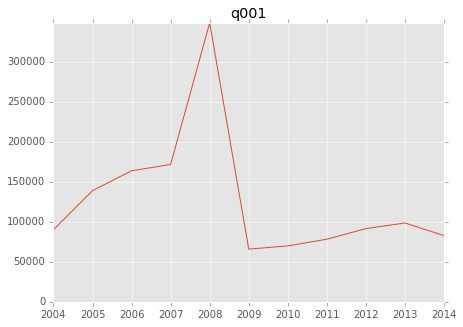

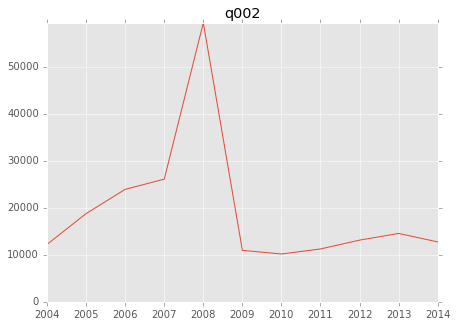

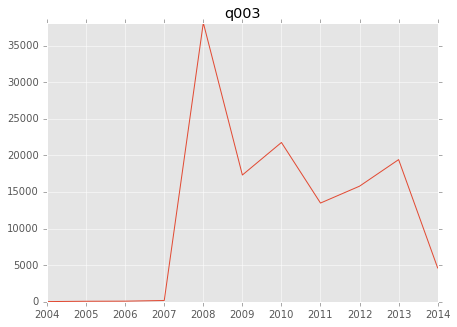

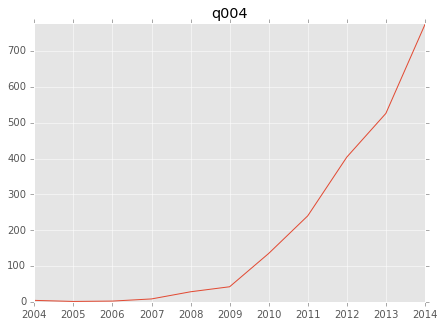

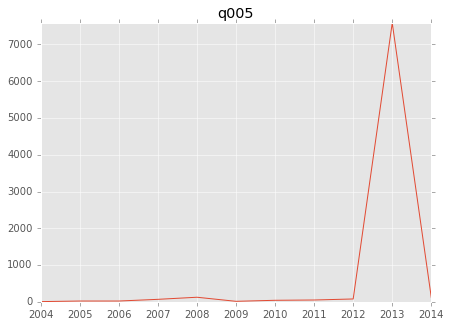

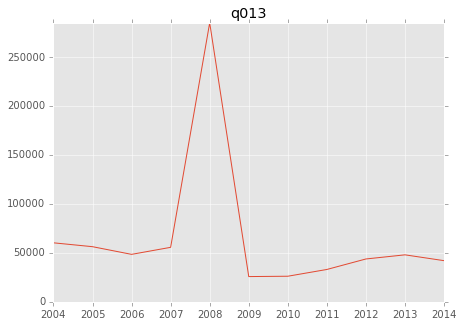

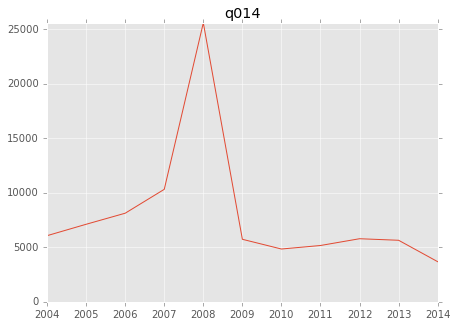

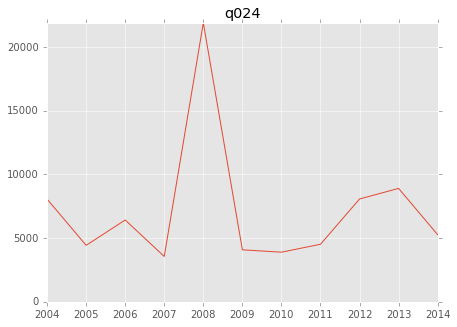

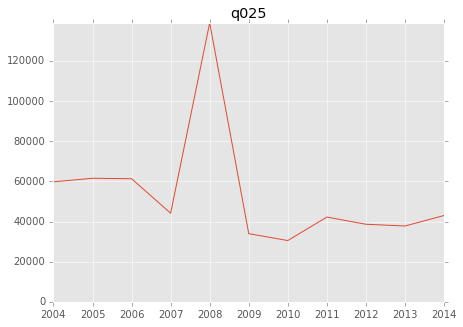

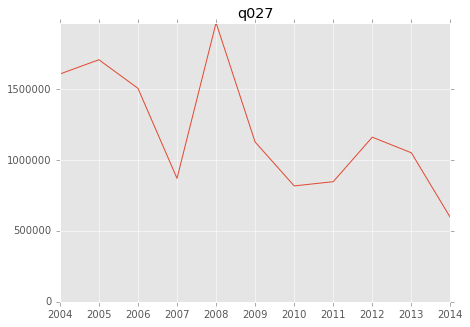

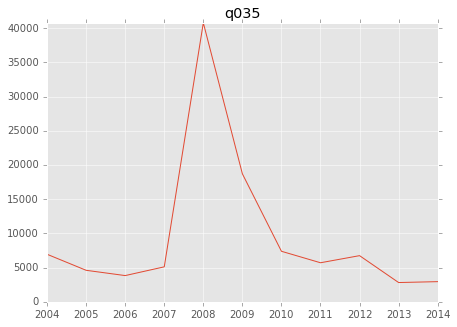

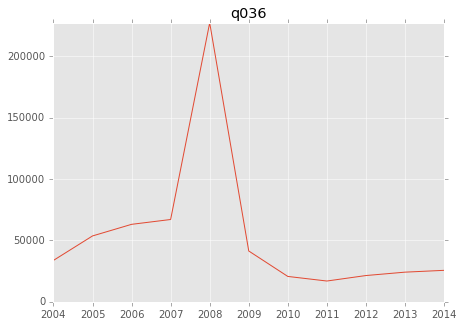

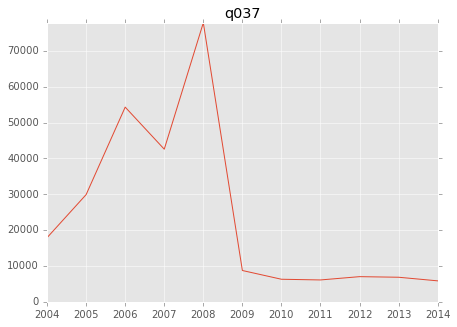

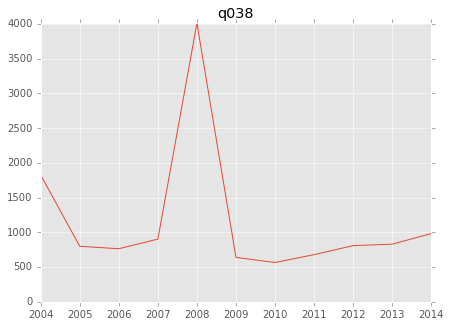

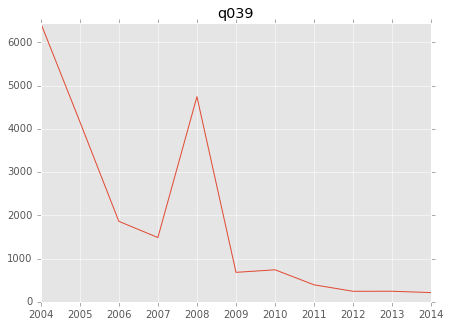

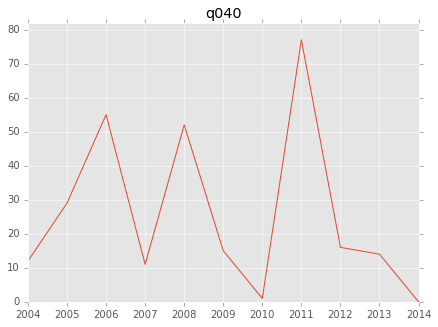

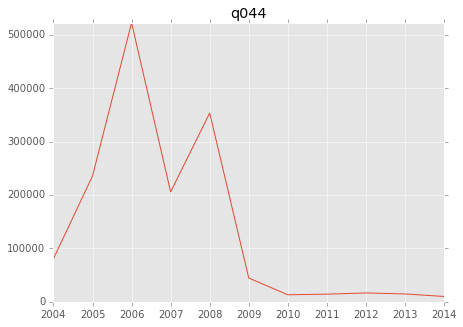

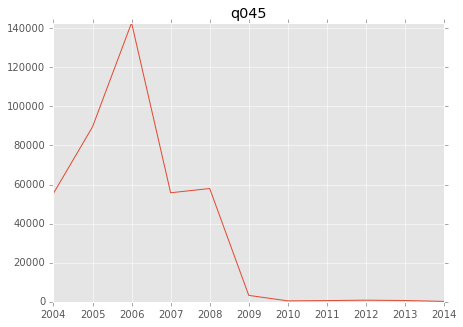

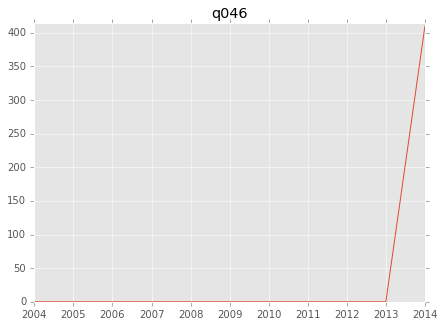

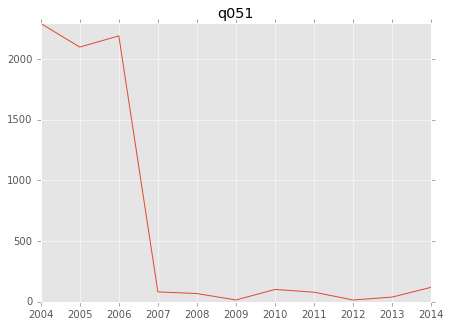

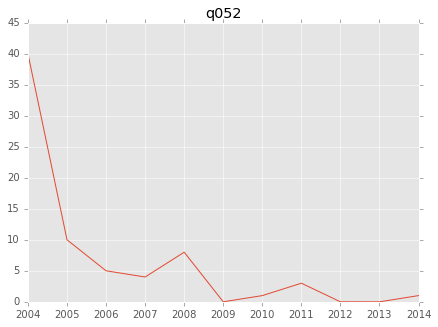

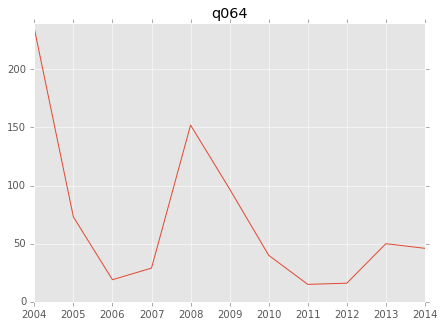

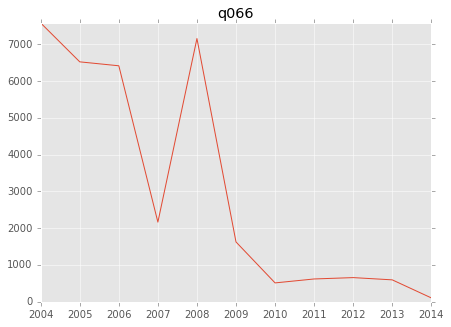

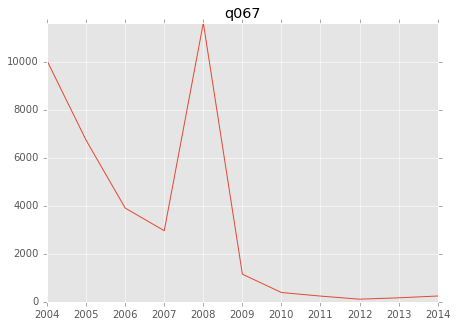

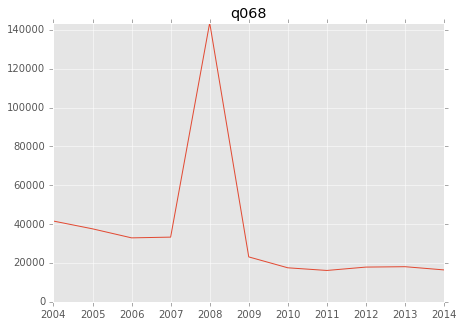

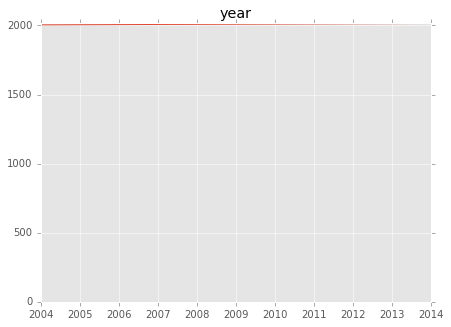

In [27]:
path = 'quality_graphs/'
graph_df = base.copy()
graph_df.fillna(0, inplace=True)
for col in graph_df.columns:
    y = graph_df[col]
    x = list(range(len(graph_df[col])))
    #print(y)
    #print(x)
    #print(base.index)
    x_ticks = [tick for tick in base.year]#list(base.index)
    #x_ticks = np.asarray(x_ticks)
    #print(x_ticks)
    #convert xticks to ndarray
    
    plt.figure(figsize=(7,5))
    plt.xticks(x, x_ticks)
    plt.ylim(0,max(y)+5)
    #print(max(y))
    plt.title(col)
    plt.plot(x, y)
    
    if not os.path.exists(path):
        os.makedirs(path)
    plt.savefig(path + col)